# Segment individual animals from collection

* https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html
  * https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html
* https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

In [1]:
!ls -l *.jpg

-rw-r--r-- 1 olive 197609 224686 Mar 27 11:00 cat-sample-collection.jpg
-rw-r--r-- 1 olive 197609 148693 Mar 27 10:57 dog-sample-collection.jpg


In [231]:
collection_image_path = 'dog-sample-collection.jpg'
# collection_image_path = 'cat-sample-collection.jpg'

In [232]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (45, 12)

(1300, 1300, 3)

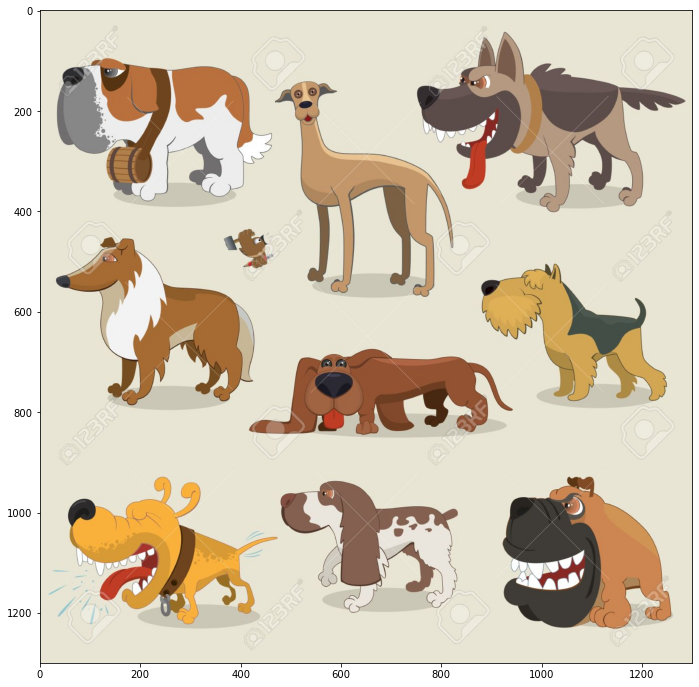

In [233]:
img = cv.imread(collection_image_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img);
img.shape

In [234]:
# kernel = np.ones((10,10),np.uint8)
# opening = cv.morphologyEx(img,cv.MORPH_OPEN,kernel, iterations = 1)
# plt.imshow(opening);

255

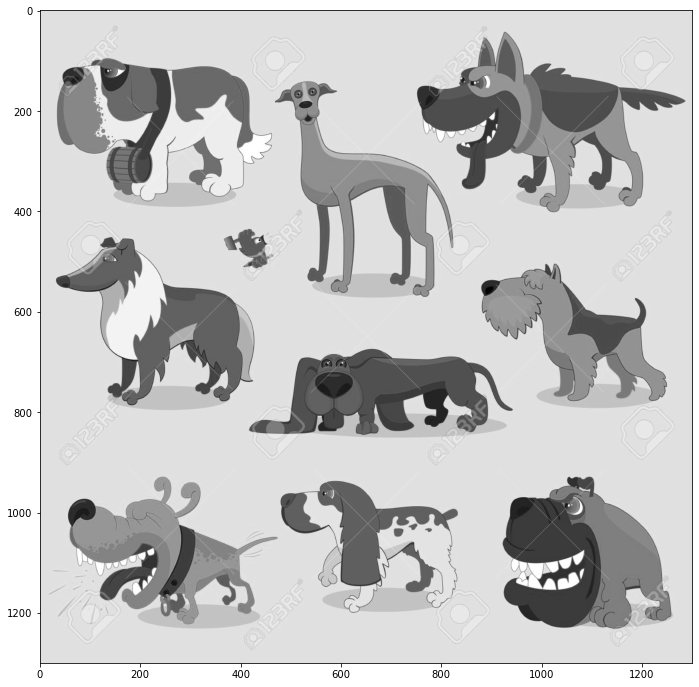

In [235]:
# gray = cv.cvtColor(opening, cv.COLOR_BGR2GRAY)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');
np.max(gray)

In [236]:
# ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
# plt.imshow(thresh, cmap='gray')
# ret

162.0

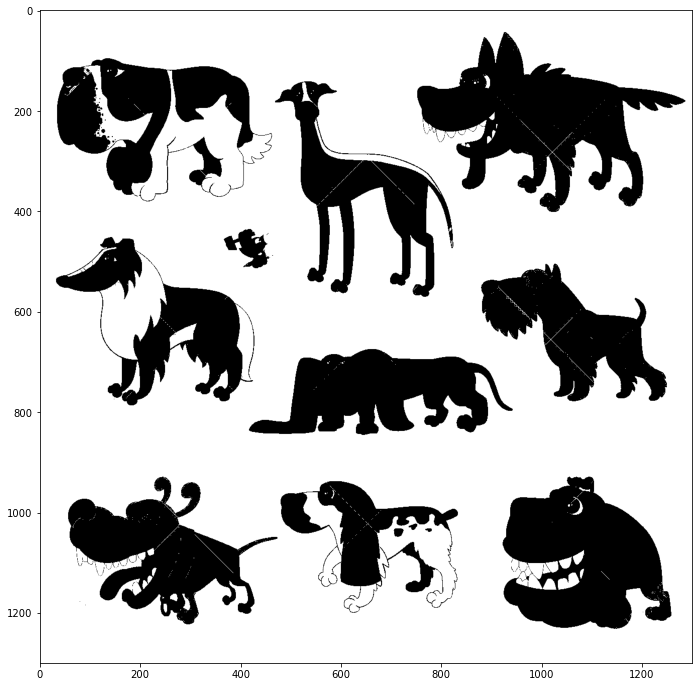

In [237]:
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
ret

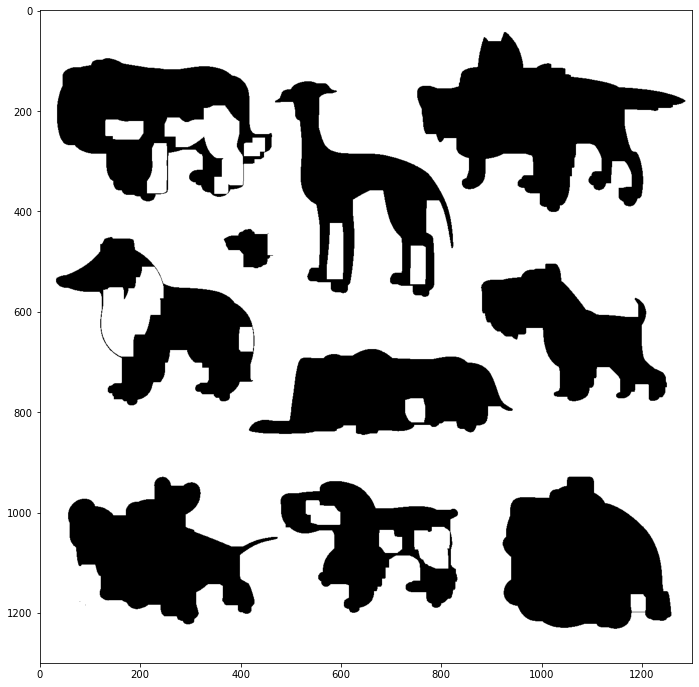

In [276]:
kernel = np.ones((25,25),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)
plt.imshow(opening, cmap='gray');

In [277]:
# kernel = np.ones((5,5),np.uint8)
# dilated = cv.dilate(opening,kernel,iterations=3)
# plt.imshow(dilated, cmap='gray');

In [278]:
# contours, hierarchy = cv.findContours(dilated, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv.findContours(opening, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

(1300, 1300, 3)

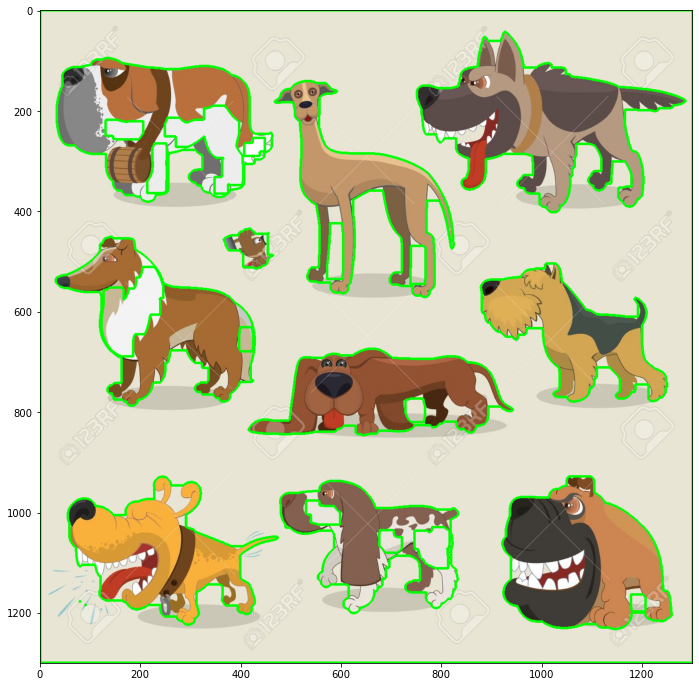

In [279]:
contours_img = cv.drawContours(img.copy(), contours, -1, (0,255,0), 3)
plt.imshow(contours_img)
contours_img.shape

In [280]:
len(contours)

34

In [281]:
areas = [cv.contourArea(cnt) for cnt in contours if cv.contourArea(cnt) != 0]
np.max(areas)

1687401.0

In [295]:
area_min_threshold = 10_000
area_max_threshold = 1_000_000
filtered_contours = [cnt for cnt in contours if cv.contourArea(cnt) > area_min_threshold and cv.contourArea(cnt) < area_max_threshold]
len(filtered_contours)

9

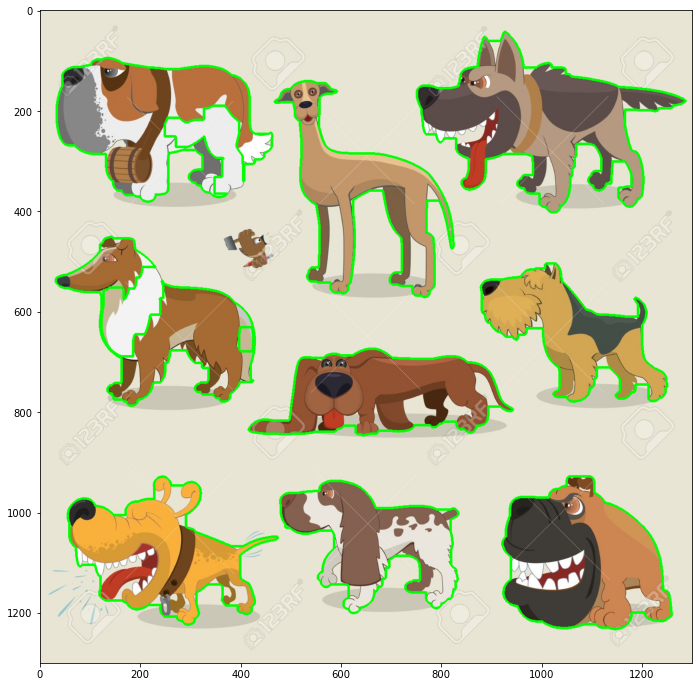

In [296]:
contours_img = cv.drawContours(img.copy(), filtered_contours, -1, (0,255,0), 3)
plt.imshow(contours_img);
# contours_img.shape

In [290]:
polys = []
for cnt in filtered_contours:
    epsilon = 0.01*cv.arcLength(cnt,True)
    approx = cv.approxPolyDP(cnt,epsilon,True)
    polys.append(approx)
    

In [291]:
len(polys)

0

(1300, 1300, 3)

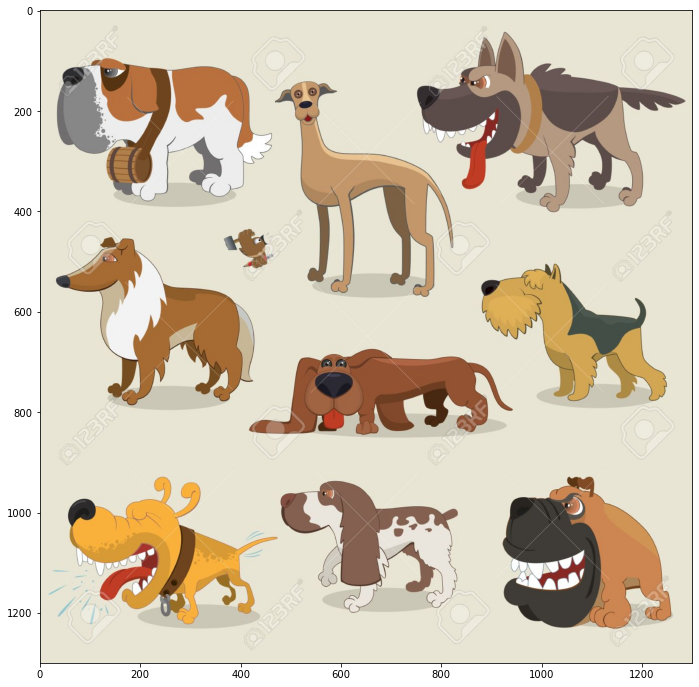

In [292]:
contours_img = cv.drawContours(img.copy(), polys, -1, (0,255,0), 3)
plt.imshow(contours_img)
contours_img.shape

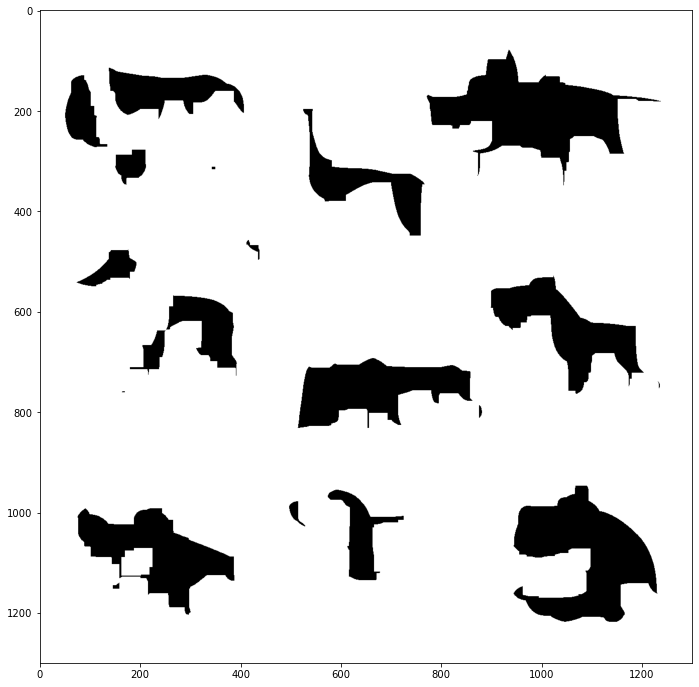

In [24]:
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, cmap='gray')

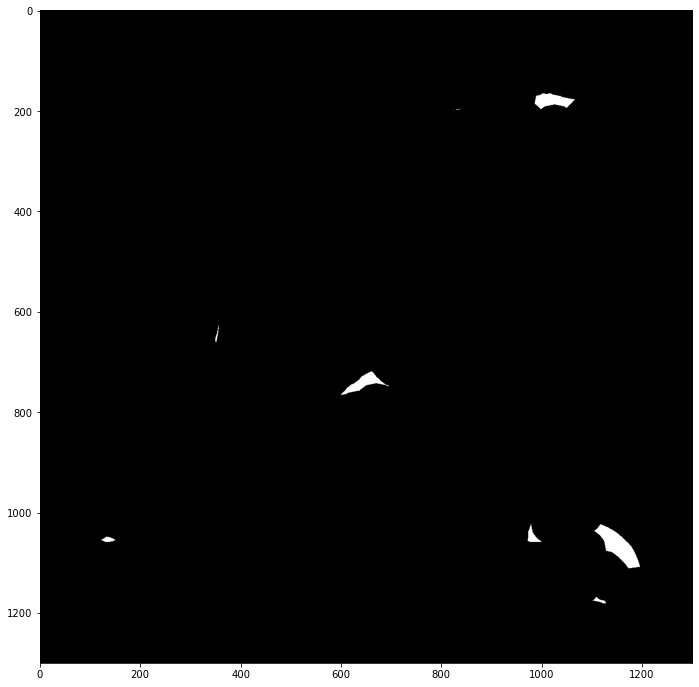

In [10]:
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray')

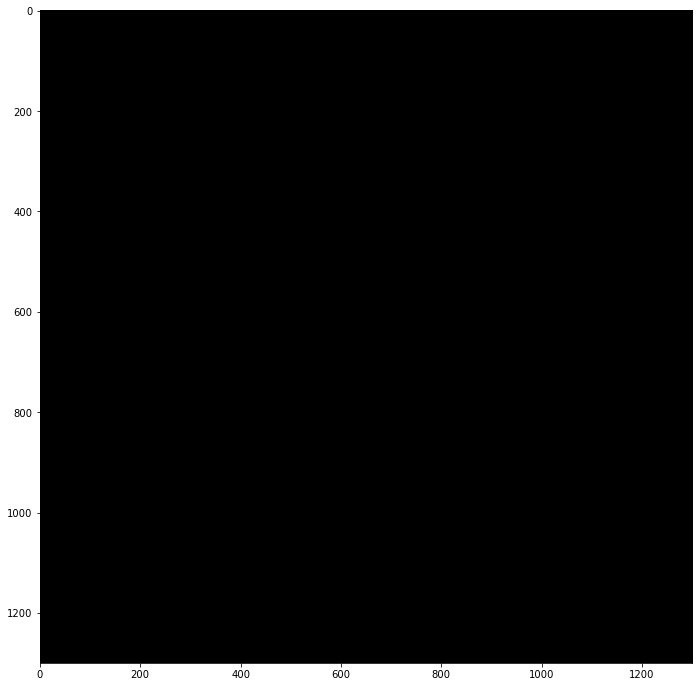

In [11]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
# unknown = cv.subtract(sure_bg,sure_fg)
unknown = cv.subtract(sure_fg, sure_bg)
plt.imshow(unknown, cmap='gray')